In [1]:
#와인의 도수, 당도, ph 값으로 로지스틱 회귀를 이용하여 레드와인과 화이트와인을 분류하기
# http://bit.ly/wine_csv_data

import pandas as pd

wine = pd.read_csv('http://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [2]:
# pandas info()메서든ㄴ 데이터프레임의 각 열의 데이터 타입과 누락된 데이터가 있는지 확인하는데 유용함
wine.info()
# non-null count가 6497이므로 누락된 값은 없는 것 같음.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
alcohol    6497 non-null float64
sugar      6497 non-null float64
pH         6497 non-null float64
class      6497 non-null float64
dtypes: float64(4)
memory usage: 203.1 KB


In [3]:
#describe() 열에 대한 간략한 통계를 출력 : 최소, 최대 평균값을 알 수 있음
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [4]:
#describe()을 통해 알 수 있는 것은 알콜,당도, PH 값이 스케일이 다르다는 것
#따라서 StandardScaler를 통해 특성을 표준화해야 함. 
#인풋과 타겟을 분리

data = wine[['alcohol', 'sugar', 'pH']].to_numpy()
target= wine[['class']].to_numpy()

In [5]:
#테스트와 훈련셋을 분리
from sklearn.model_selection import train_test_split

#test_size = 0.2 는 전체에서 0.2만 테스트로 쓴다는말 지정하지 않으면 0.25 즉 25%만 지정함. 
train_input, test_input, train_target, test_target = train_test_split(data, target, test_size=0.2, random_state=42)

print(train_input.shape, test_input.shape)

(5197, 3) (1300, 3)


In [8]:
#전처리 할 차례

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [11]:
#로지스틱 회귀를 통한 훈련 및 테스트
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(train_scaled, train_target)

print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))


0.7808350971714451
0.7776923076923077


C:\Users\gunny\AppData\Local\conda\conda\envs\keras_gpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\gunny\AppData\Local\conda\conda\envs\keras_gpu\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
# 생각보다 진전이 없음
# 따라서 게수와 절편을 출력함
print(lr.coef_, lr.intercept_)

[[ 0.51210134  1.66733492 -0.68674142]] [1.81172715]


In [13]:
#결정트리를 통해서 이를 훈련해 보기
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))


0.996921300750433
0.8592307692307692


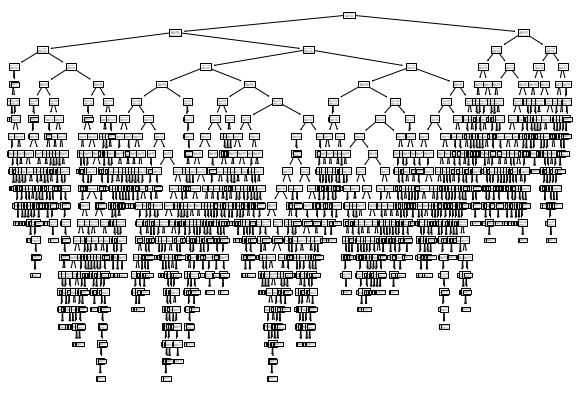

In [15]:
# 이전 방법보다 좋음. 트리 그림을 출력해서 볼 수 있도록 할것
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

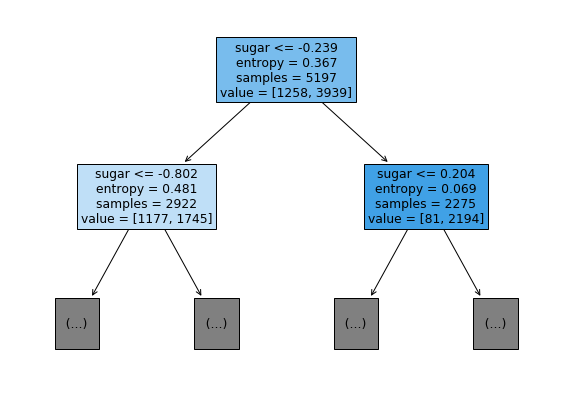

In [17]:
#너무 많으니 tree의 깊이를 제한해서 출력 : max_depth 1은 루트와 하나 의 노드 확장해서 그림
plt.figure(figsize=(10,7))
#filled 가 True이면 한쪽에 비율이 높아지면 점점 진한색으로 변경됨
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [18]:
#결정트리에서 무조건적으로 가지를 만드는 것이 아니라 가지의 개수를 지정하여 분류할 수있는 형태로까지 지정해 줘야 함. 
# max_depth를 통해 이를 조정해봄

dt = DecisionTreeClassifier(max_depth=3, random_state=42)

dt.fit(train_scaled, train_target)

print(dt.score(train_scaled, train_target))
print(dt.score(test_scaled, test_target))

0.8454877814123533
0.8415384615384616


In [19]:
print(dt.random_state)

42


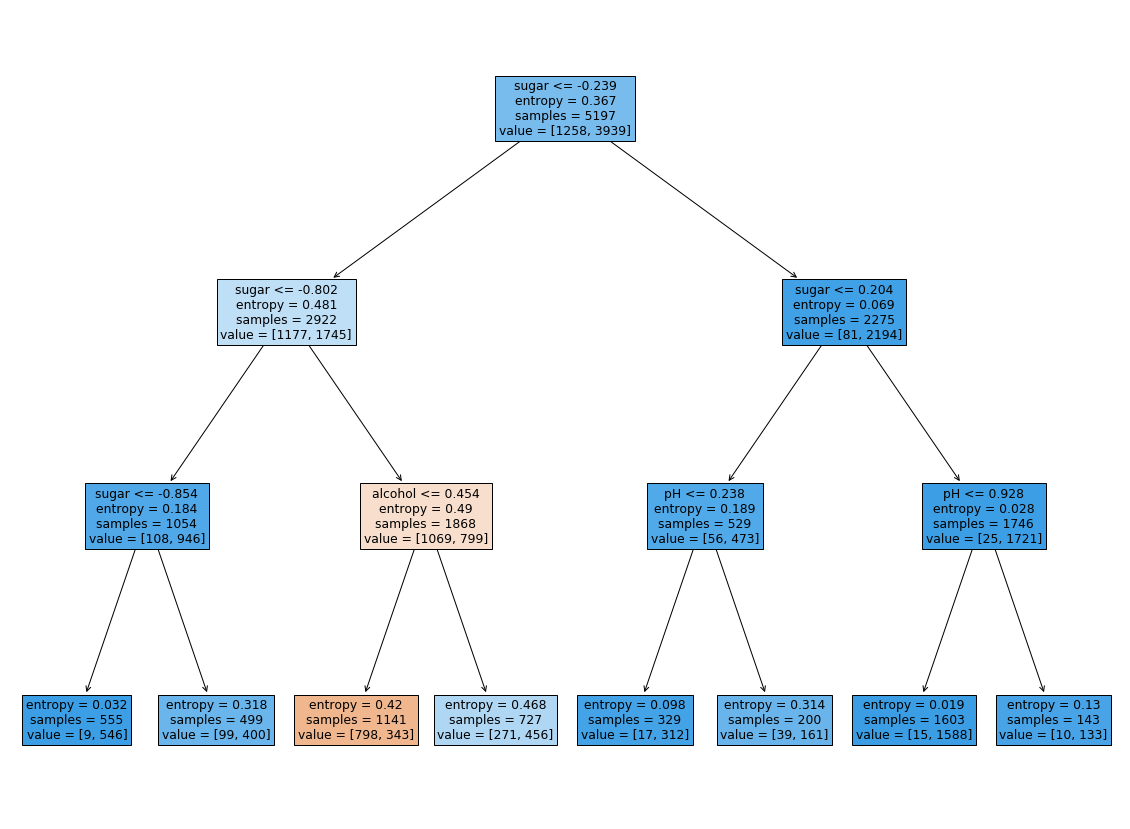

In [20]:
#그림을 그려서 확인하기
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [22]:
# 결정트리는 전처리가 필요없음

dt = DecisionTreeClassifier(max_depth=3, random_state=42)

dt.fit(train_input, train_target)

print(dt.score(train_input, train_target))
print(dt.score(test_input, test_target))

0.8454877814123533
0.8415384615384616


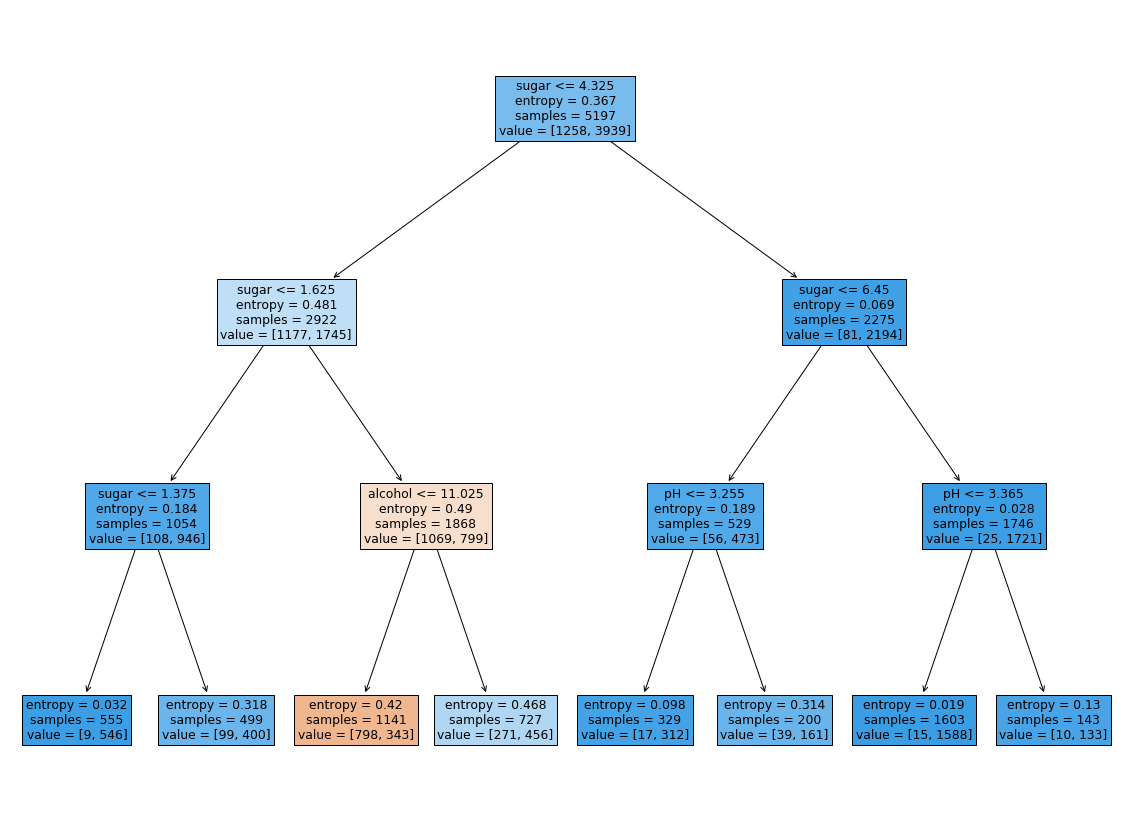

In [23]:
#전처리를 하지 않았기 대문에 이 갑에 대해서 원래 값으로 판단하기 쉬움
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcohol', 'sugar', 'pH'])
plt.show()

In [24]:
#이러한 특성들 중에서 구분될 수 있는 가장 유용한 특성을 알아내기
print(dt.feature_importances_)
# 알콜, 당도, pH에서 당도가 가장 중요함. 

[0.12345626 0.86862934 0.0079144 ]
